In [104]:
import numpy as np
from numpy.typing import ArrayLike, NDArray
from typing import Union, Any
import matplotlib.pyplot as plt

I will be taking a series of approximate characteristic samples of the line in Fig 1b of [this paper](https://www.researchgate.net/profile/Rudy-Gargano/publication/268484767_Residential_Water_Demand-Daily_Trends/links/5b4864d50f7e9b4637d22cc2/Residential-Water-Demand-Daily-Trends.pdf). I will be eyeballing this as the exact numbers are not particularly important. We just want to capture the time-dependency of the relative water demand.

I am choosing Fig 1b because this is the smallest population and as such closest to that of a single building. As this small scale, idiosyncratic patterns such as when people are eating lunch seem to start to emerge and not be subsumed by noise, which seems valuable to characterize as it would be more prominent at the scale of a single building.

In [105]:
# the first tuple element is the time of day, second is the relative demand
# level at that time as a multiple of the average demand level
water_demand_sample = np.array([
    [0, 0.5],
    [3, 0.2],
    [6, 0.25],
    [7, 1.75],
    [12, 1.25],
    [13, 1.5],
    [14, 1.4],
    [16, 0.9],
    [18.5, 1.25],
    [19, 1.75],
    [20, 1.75],
    [24, 0.4],
])

In [106]:
# We want this to be close to one to match the semantics of the original data
np.mean(water_demand_sample[:, 1])

1.075

Now, we'll interpolate this data to provide a sample per minute and add normally-distributed noise to make it more similar to the real world data.

In [107]:
MINUTES_PER_DAY = 60 * 24

In [108]:
rng = np.random.default_rng(seed=42)

In [109]:
water_demand = np.interp(np.linspace(0, 24, MINUTES_PER_DAY), water_demand_sample[:, 0], water_demand_sample[:, 1]) + rng.normal(size=MINUTES_PER_DAY, scale=0.05)

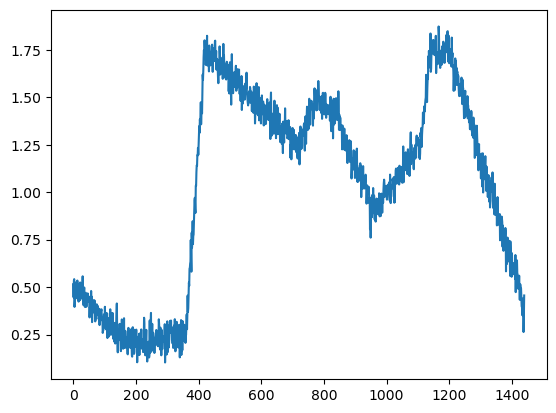

In [110]:
plt.plot(np.arange(MINUTES_PER_DAY), water_demand)

Now we'll create a function that can take in a float time of day (in minutes),
round it to the nearest whole minute, and return the sample. This function is
also vectorized.

In [111]:
def relative_occupant_water_demand(t: ArrayLike) -> Union[np.floating[Any], NDArray[np.floating[Any]]]:
    """Given a the time of day in minutes t, returns the estimated factor of
    occupant water demand relative to average water demand."""

    t_whole_min = np.rint(t).astype(np.int32)
    return water_demand[t_whole_min]

In [112]:
relative_occupant_water_demand([200, 400, 800, 1000, 1200])

array([0.22247289, 1.2479687 , 1.42348783, 0.9919907 , 1.67918219])

In [113]:
relative_occupant_water_demand(200)

0.22247289005287232

The results from `building-heights.ipynb` suggest that our Typical Building as about 255.68 people in it. Data from the NYC government indicates an average water usage of about 420.18 liters/day.

In [114]:
PER_PERSON_MEAN_WATER_CONSUMPTION_LITER_PER_DAY = 420.18
TYPICAL_BUILDING_N_PEOPLE = 255.68
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_DAY = PER_PERSON_MEAN_WATER_CONSUMPTION_LITER_PER_DAY * TYPICAL_BUILDING_N_PEOPLE
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE = TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_DAY / MINUTES_PER_DAY
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE

74.60529333333334

We can mutiply the value of `relative_occupant_water_demand` by
`TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_PER_MINUTE` to get an estimate of the
water demand at the desired minute in our typical building.

In [115]:
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE * relative_occupant_water_demand(200)

16.597655221108955